# Baseline Binary Logistic regression Model




In [329]:
import pandas as pd   
import numpy as np 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import log_loss

In [330]:
tz_data = pd.read_csv('tz_data.csv')

In [331]:
tz_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder                 59400 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              59400 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   basin                  59400 non-null  object 
 8   population             59400 non-null  int64  
 9   public_meeting         59400 non-null  bool   
 10  scheme_management      59400 non-null  object 
 11  permit                 59400 non-null  bool   
 12  construction_year      59400 non-null  int64  
 13  extraction_type_class  59400 non-null  object 
 14  payment_type           59400 non-null  object 
 15  qu

In [332]:
data = tz_data.copy()
data

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,payment_type,quality_group,quantity_group,source,waterpoint_type_group,status_group
0,69572,6000.0,other,1390,other,34.938093,-9.856322,Lake Nyasa,109,True,VWC,False,1999,gravity,annually,good,enough,spring,communal standpipe,2
1,8776,0.0,other,1399,other,34.698766,-2.147466,Lake Victoria,280,True,other,True,2010,gravity,never pay,good,insufficient,rainwater harvesting,communal standpipe,2
2,34310,25.0,other,686,other,37.460664,-3.821329,Pangani,250,True,VWC,True,2009,gravity,per bucket,good,enough,dam,communal standpipe,2
3,67743,0.0,other,263,other,38.486161,-11.155298,Ruvuma / Southern Coast,58,True,VWC,True,1986,submersible,never pay,good,dry,machine dbh,communal standpipe,0
4,19728,0.0,other,0,other,31.130847,-1.825359,Lake Victoria,0,True,VWC,True,2000,gravity,never pay,good,seasonal,rainwater harvesting,communal standpipe,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,other,1210,other,37.169807,-3.253847,Pangani,125,True,Water Board,True,1999,gravity,per bucket,good,enough,spring,communal standpipe,2
59396,27263,4700.0,other,1212,other,35.249991,-9.070629,Rufiji,56,True,VWC,True,1996,gravity,annually,good,enough,river,communal standpipe,2
59397,37057,0.0,Government Of Tanzania,0,DWE,34.017087,-8.750434,Rufiji,0,True,VWC,False,2000,handpump,monthly,fluoride,enough,machine dbh,hand pump,2
59398,31282,0.0,other,0,other,35.861315,-6.378573,Rufiji,0,True,VWC,True,2000,handpump,never pay,good,insufficient,shallow well,hand pump,2


In [333]:
data['permit'] = data['permit'].astype(int)

In [334]:
data['public_meeting'] = data['public_meeting'].astype(int)

In [335]:
data = data.drop('id', axis =1)

In [336]:
cat_cols = ['funder', 'installer', 'basin', 'scheme_management', 'extraction_type_class', 'payment_type', 'quality_group', 
              'quantity_group', 'source', 'waterpoint_type_group']

num_cols = ['amount_tsh', 'gps_height', 'longitude', 'population', 'public_meeting']

In [337]:
data = pd.get_dummies(data, columns = dummy_cols)

In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 76 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   amount_tsh                                59400 non-null  float64
 1   gps_height                                59400 non-null  int64  
 2   longitude                                 59400 non-null  float64
 3   latitude                                  59400 non-null  float64
 4   population                                59400 non-null  int64  
 5   public_meeting                            59400 non-null  int64  
 6   permit                                    59400 non-null  int64  
 7   construction_year                         59400 non-null  int64  
 8   status_group                              59400 non-null  int64  
 9   funder_Danida                             59400 non-null  bool   
 10  funder_Government Of Tanzania     

In [339]:
bool_columns = data.select_dtypes(include=bool).columns
data[bool_columns] = data[bool_columns].astype(int)

# Target
>- 0 = functional
>- 1 = functional but needs repair
>- 2 =  non functional
>- 0 and 1 will now be functional water pumps and 1 representing functional water pumps

In [340]:
target_status = {0: 1, 1: 1, 2 : 0}
data['status_group'] = data['status_group'].replace(target_status)

In [341]:
X = data.drop('status_group', axis=1)  
y = data['status_group'] 

In [342]:
data['status_group'].value_counts()

status_group
0    32259
1    27141
Name: count, dtype: int64

In [343]:
print(data["status_group"].value_counts(normalize=True))

status_group
0    0.543081
1    0.456919
Name: proportion, dtype: float64


# Dummy

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [345]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Confusion matrix, without normalization
[[10719     0]
 [ 8883     0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


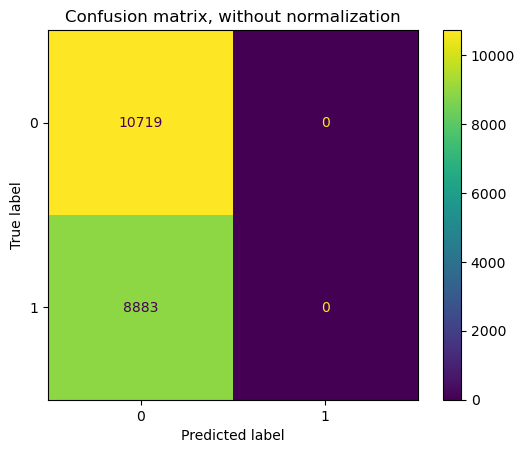

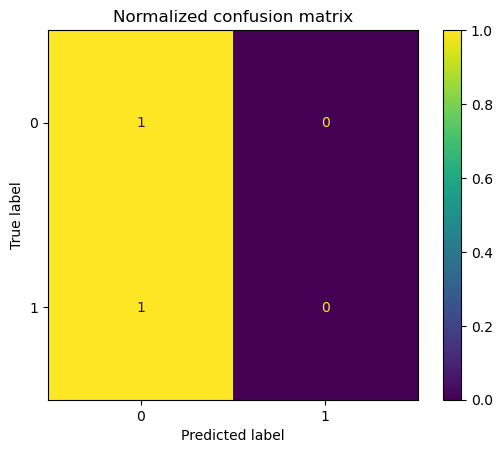

In [346]:
confusion_matrix_options = [("Confusion matrix, without normalization", None),
                            ("Normalized confusion matrix", 'true')]

# Iterate over the options and display the confusion matrix for each
for title, normalize in confusion_matrix_options:
    # Create a dummy classifier with a constant prediction of 1
    dummy_clf = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
    
    # Generate the confusion matrix display using the dummy classifier
    disp = ConfusionMatrixDisplay.from_estimator(dummy_clf, X_test, y_test, normalize=normalize)
      
    # Set the title of the confusion matrix display
    disp.ax_.set_title(title)

    # Print the title and the confusion matrix
    print(title)
    print(disp.confusion_matrix)

# Show the plot with all the confusion matrices
plt.show()

In [347]:
dummy_model = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

In [348]:
dummy_model.score(X_train, y_train)

0.541233227800392

In [349]:
dummy_model.score(X_test, y_test)

0.546831955922865

In [350]:
y_train.value_counts(normalize=True)

status_group
0    0.541233
1    0.458767
Name: proportion, dtype: float64

In [351]:
dummy_accuracy = accuracy_score(y_test, y_pred)
dummy_accuracy

0.7444648505254566

In [352]:
dummy_recall = recall_score(y_test, y_pred, average=None)
dummy_recall

array([0.87153652, 0.59112912])

In [353]:
dummy_precision = precision_score(y_test, y_pred, average=None)
dummy_precision

array([0.7200555 , 0.79224502])

In [354]:
dummy_f1 = f1_score(y_test, y_pred, average=None)
dummy_f1

array([0.78858735, 0.67706789])

# Model Evaluation

In [355]:
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)

cv_results

array([0.54120603, 0.54120603, 0.54120603, 0.54127403, 0.54127403])

In [356]:
class ModelWithCV():
    '''Structure to save the model and more easily see its cross-validation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, cv=5):
        '''
        Perform cross-validation and store the results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          cv:
            Optional; Number of folds for CV (default is 5)  
        '''
        
        cv_X = X if X is not None else self.X
        cv_y = y if y is not None else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=cv)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        if self.cv_results is not None:
            cv_summary = (
            f'''CV Results for `{self.name}` model:
                Mean Accuracy: {self.cv_mean:.5f}
                Standard Deviation: {self.cv_std:.5f}
            ''')
            print(cv_summary)
        else:
            print("No cross-validation results available.")

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        if self.cv_results is not None:
            ax.set_title(f'CV Results for `{self.name}` Model')
            sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
            sns.swarmplot(
                    y=self.cv_results,
                    color='orange',
                    size=10,
                    alpha= 0.8,
                    ax=ax
            )
        else:
            ax.set_title("No cross-validation results available.")

        return ax

In [357]:
dummy_model_results = ModelWithCV(
    model=dummy_model,
    model_name = 'Dummy',
    X=X_train,
    y=y_train
)

CV Results for `Dummy` model:
                Mean Accuracy: 0.54123
                Standard Deviation: 0.00003
            


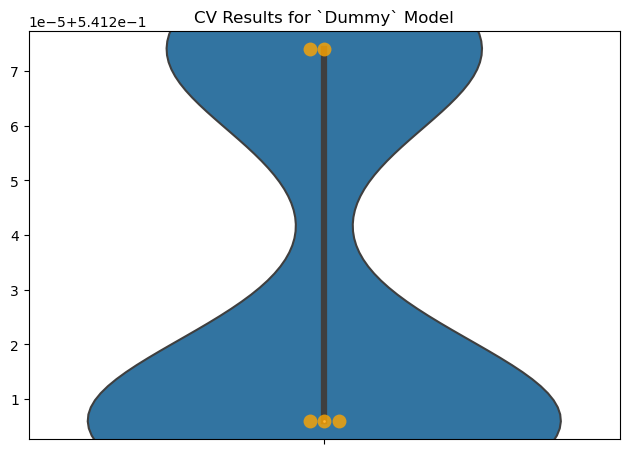

In [358]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots()

ax = dummy_model_results.plot_cv(ax)
plt.tight_layout();

dummy_model_results.print_cv_summary()

# LogisticRegression

In [360]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

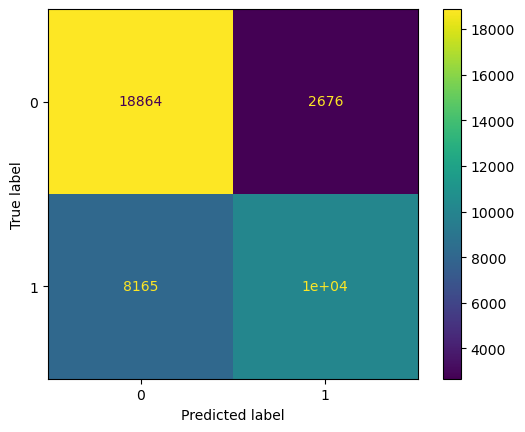

In [361]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
baseline_model = LogisticRegression(random_state=42, max_iter=10000)

# Fit the model on the scaled data
baseline_model.fit(X_train_scaled, y_train)

ConfusionMatrixDisplay.from_estimator(model, X_train_scaled, y_train);

In [362]:
baseline_neg_log_loss_cv = cross_val_score(estimator=baseline_model, X=X_train_scaled, y=y_train, scoring="neg_log_loss")

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

0.5091332570889694

In [363]:
log_loss(y_train, np.zeros(len(y_train)))

16.535630523606734

In [365]:
cv_scores = cross_val_score(baseline_model, X_train_scaled, y_train, cv=3)
cv_scores

array([0.74543947, 0.74038896, 0.7394844 ])

In [366]:
model_accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
model_recall = recall_score(y_test, model.predict(X_test_scaled))
model_precision = precision_score(y_test, model.predict(X_test_scaled))
model_f1 = f1_score(y_test, model.predict(X_test_scaled))
model_accuracy

0.7311498826650342